In [1]:
#Import all Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#verify current path
import os
os.getcwd()

'C:\\Users\\kvenugopal'

In [3]:
#change path
os.chdir("C:/Users\kvenugopal/OneDrive - ZF Friedrichshafen AG/Desktop")

In [4]:
#verify new directory
os.getcwd()

'C:\\Users\\kvenugopal\\OneDrive - ZF Friedrichshafen AG\\Desktop'

In [5]:
#read excel file
dt=pd.read_excel("SS50R.xlsx", sheet_name='Sheet1')

In [6]:
#make a copy
dt1=dt.copy()

In [7]:
#Information of the file and data types
dt1.head()
dt1.shape

(99, 13)

In [8]:
#understanding the spread of numeric variables
dt1.describe()

,Rubber_seal_outer_Diameter,Rubber seal Thickness,Spring seat Depth,Rubber spring depth,TOTAL PISTON HEIGHT,Spring seat thickness,Pressure_piece_height,AFTER LOAD AT 0.5 MM,AFTER LOAD AT 3 MM,AFTER LOAD AT 0.5 MM(2 HRS LATER),AFTER LOAD AT 3 MM(2 HRS LATER),Crack_ off,6.9 mm Test
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,35.821515,13.094495,6.870535,9.074010,27.524121,5.265394,73.023889,196.676768,525.282828,187.929293,517.010101,2.457374,6.483030
std,0.084167,0.061392,0.058433,0.025755,0.073973,0.037240,0.051024,21.012546,32.733008,21.857261,29.336713,0.183690,0.091768
min,35.600000,13.010000,6.710000,9.009000,27.400000,5.180000,72.900000,154.000000,474.000000,131.000000,463.000000,2.090000,6.320000
25%,35.764000,13.060000,6.835000,9.060000,27.480000,5.240000,72.985000,182.000000,502.000000,171.500000,497.500000,2.315000,6.440000
50%,35.820000,13.090000,6.885000,9.080000,27.512000,5.270000,73.023000,196.000000,516.000000,190.000000,513.000000,2.440000,6.470000
75%,35.870000,13.115000,6.901500,9.090000,27.560000,5.290000,73.067000,208.000000,544.000000,203.500000,532.000000,2.585000,6.510000
max,36.000000,13.480000,6.980000,9.140000,27.800000,5.400000,73.140000,260.000000,640.000000,241.000000,599.000000,2.890000,7.130000


In [9]:
dt1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Rubber_seal_outer_Diameter         99 non-null     float64
 1   Rubber seal Thickness              99 non-null     float64
 2   Spring seat Depth                  99 non-null     float64
 3   Rubber spring depth                99 non-null     float64
 4   TOTAL PISTON HEIGHT                99 non-null     float64
 5   Spring seat thickness              99 non-null     float64
 6   Pressure_piece_height              99 non-null     float64
 7   AFTER LOAD AT 0.5 MM               99 non-null     int64  
 8   AFTER LOAD AT 3 MM                 99 non-null     int64  
 9   AFTER LOAD AT 0.5 MM(2 HRS LATER)  99 non-null     int64  
 10  AFTER LOAD AT 3 MM(2 HRS LATER)    99 non-null     int64  
 11  Crack_ off                         99 non-null     float64
 

In [10]:
dt2=dt1.copy()

In [11]:
dt2.corr()

,Rubber_seal_outer_Diameter,Rubber seal Thickness,Spring seat Depth,Rubber spring depth,TOTAL PISTON HEIGHT,Spring seat thickness,Pressure_piece_height,AFTER LOAD AT 0.5 MM,AFTER LOAD AT 3 MM,AFTER LOAD AT 0.5 MM(2 HRS LATER),AFTER LOAD AT 3 MM(2 HRS LATER),Crack_ off,6.9 mm Test
Rubber_seal_outer_Diameter,1.000000,-0.283294,-0.083535,-0.046849,0.134144,0.079594,-0.001239,-0.214774,0.015039,-0.116705,-0.096163,-0.051702,-0.050420
Rubber seal Thickness,-0.283294,1.000000,0.134022,0.055388,-0.111913,-0.129006,-0.057191,0.144690,0.041811,0.121240,0.241501,0.442342,0.162722
Spring seat Depth,-0.083535,0.134022,1.000000,0.095606,-0.045315,-0.068912,-0.003385,-0.049713,0.009544,0.034984,0.093815,0.120658,0.096877
Rubber spring depth,-0.046849,0.055388,0.095606,1.000000,-0.021527,-0.072105,0.100813,0.122000,-0.010667,0.060399,0.020001,0.090228,0.005686
TOTAL PISTON HEIGHT,0.134144,-0.111913,-0.045315,-0.021527,1.000000,0.026667,-0.223980,0.017337,0.133989,-0.128641,0.163388,0.075766,0.070881
Spring seat thickness,0.079594,-0.129006,-0.068912,-0.072105,0.026667,1.000000,0.059036,0.270252,0.094659,0.102944,-0.005197,-0.048759,-0.146929
Pressure_piece_height,-0.001239,-0.057191,-0.003385,0.100813,-0.223980,0.059036,1.000000,0.136561,-0.191976,0.207909,-0.047097,-0.172974,-0.166772
AFTER LOAD AT 0.5 MM,-0.214774,0.144690,-0.049713,0.122000,0.017337,0.270252,0.136561,1.000000,0.344398,0.460612,0.112319,0.218146,0.067137
AFTER LOAD AT 3 MM,0.015039,0.041811,0.009544,-0.010667,0.133989,0.094659,-0.191976,0.344398,1.000000,0.031705,0.548690,0.119803,-0.025120
AFTER LOAD AT 0.5 MM(2 HRS LATER),-0.116705,0.121240,0.034984,0.060399,-0.128641,0.102944,0.207909,0.460612,0.031705,1.000000,0.293081,-0.004011,-0.063534


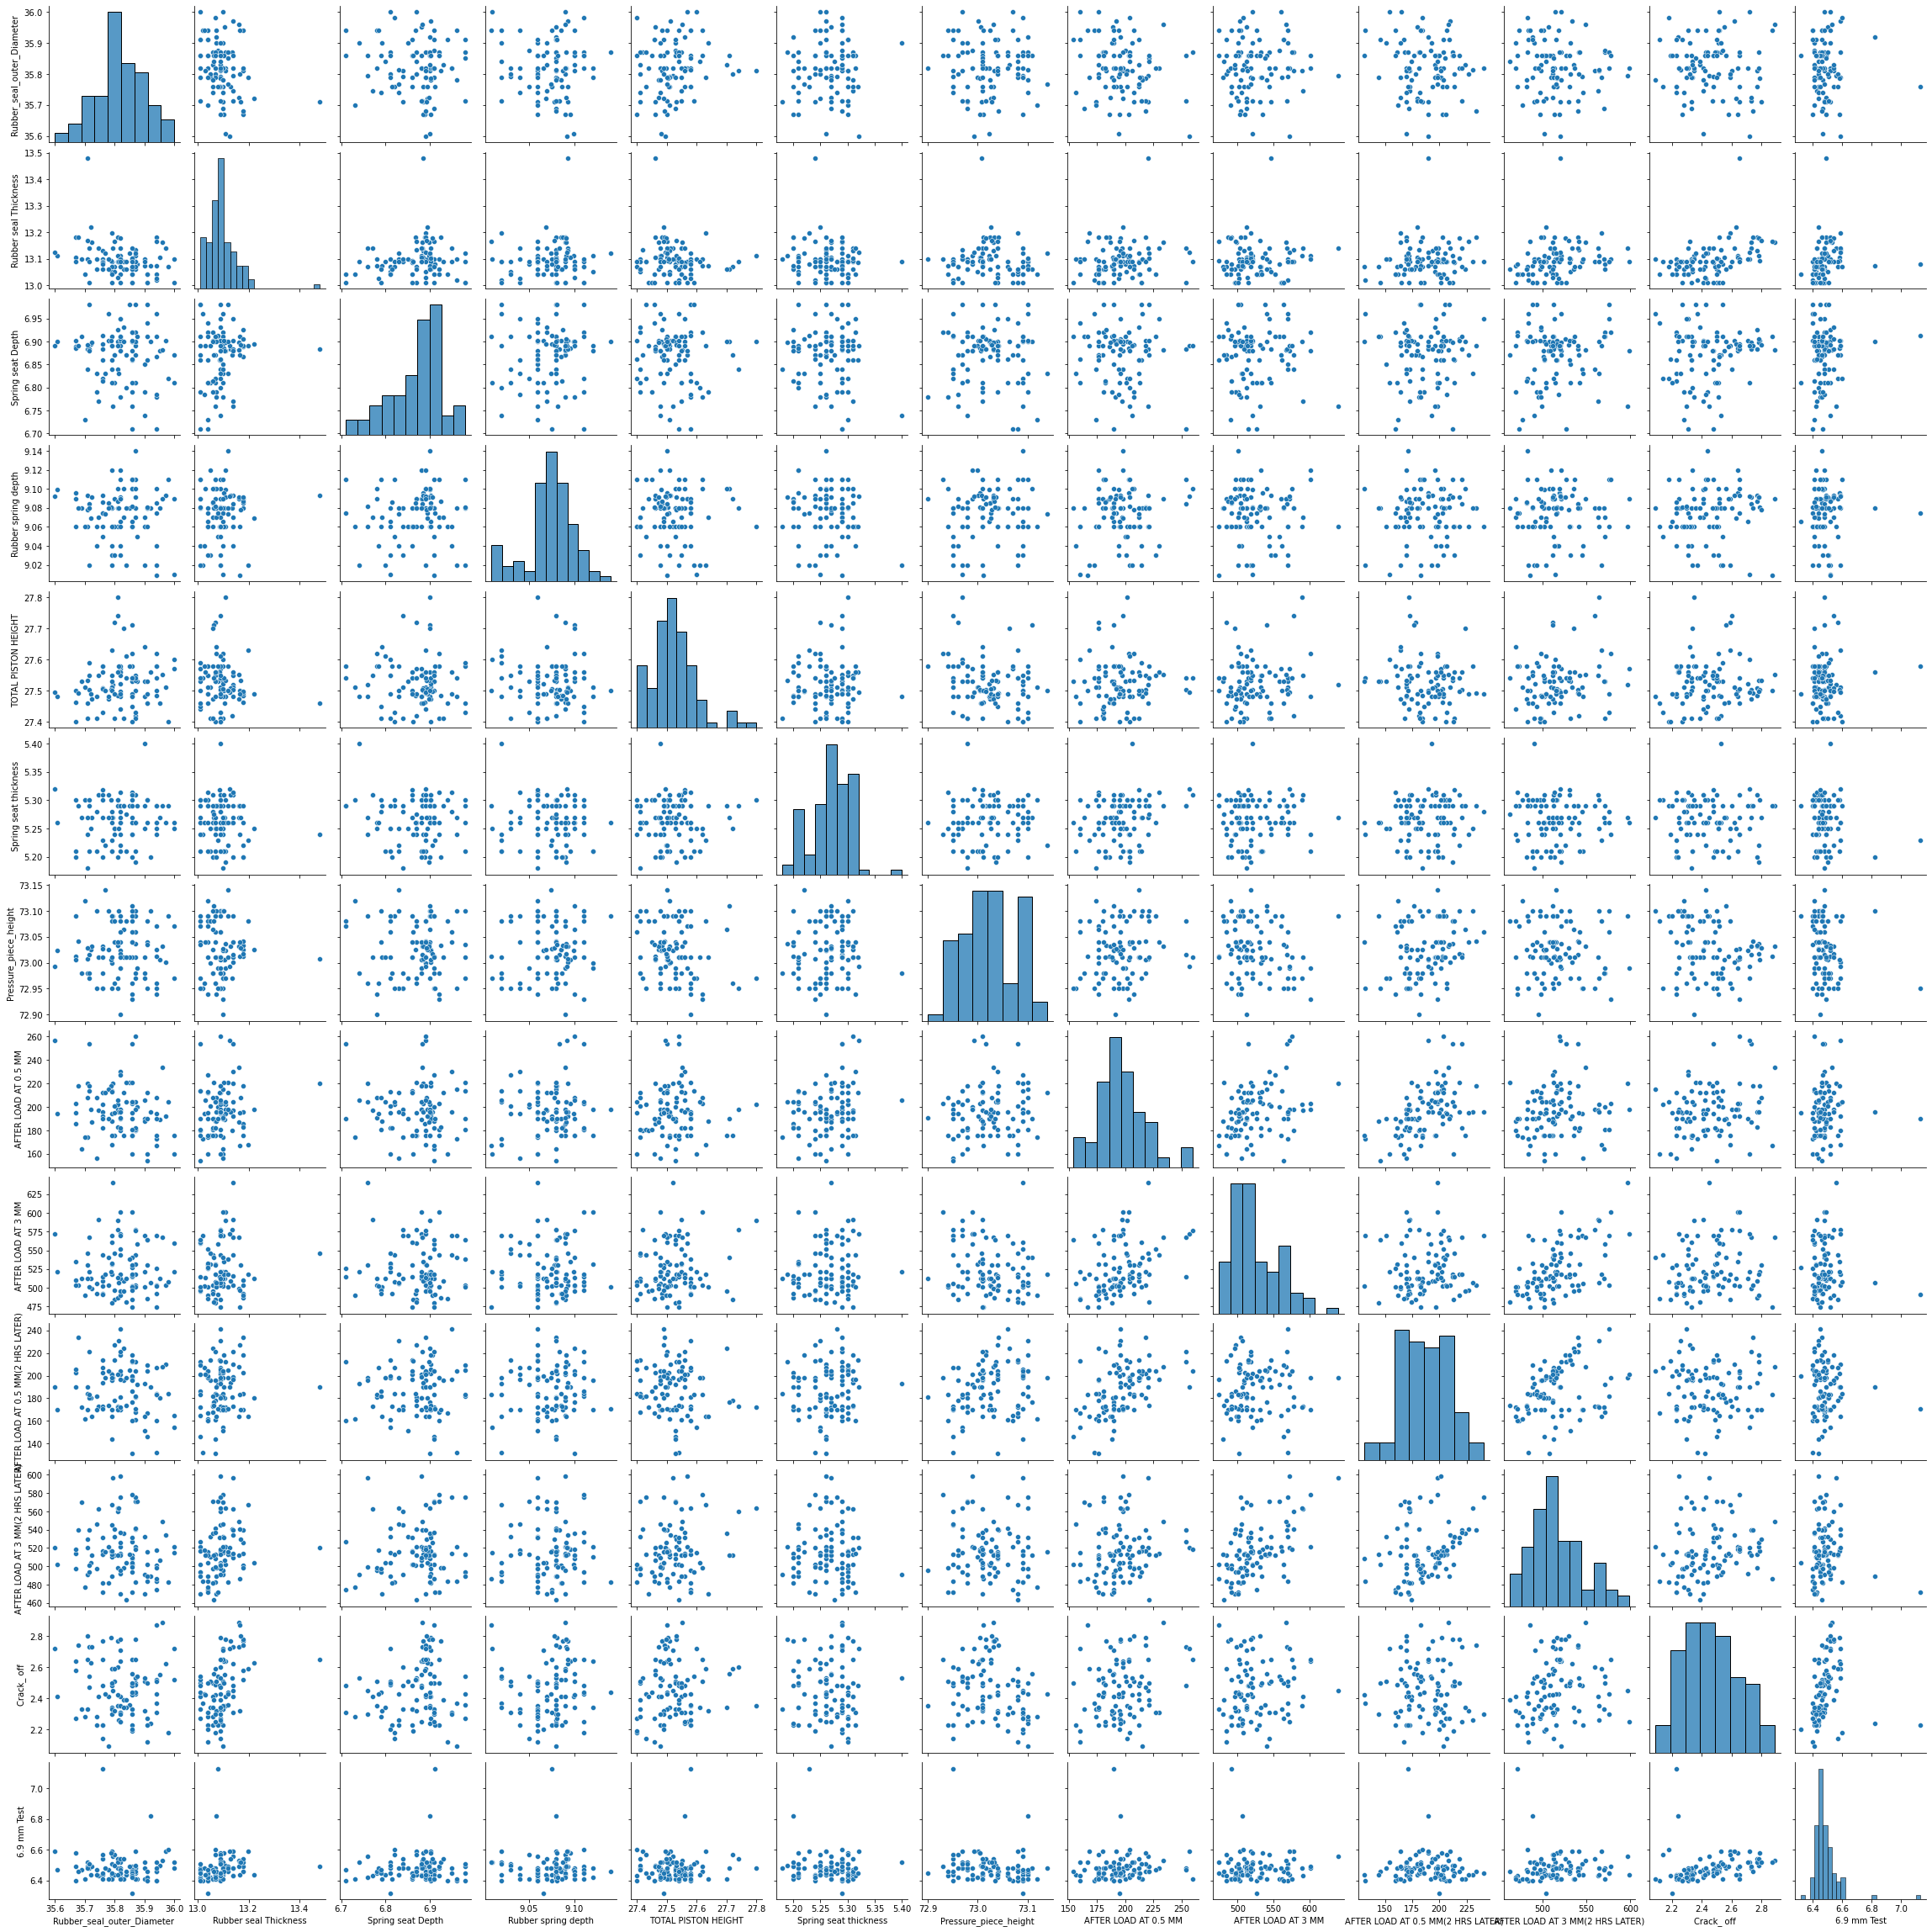

In [12]:
print(sns.pairplot(dt2))

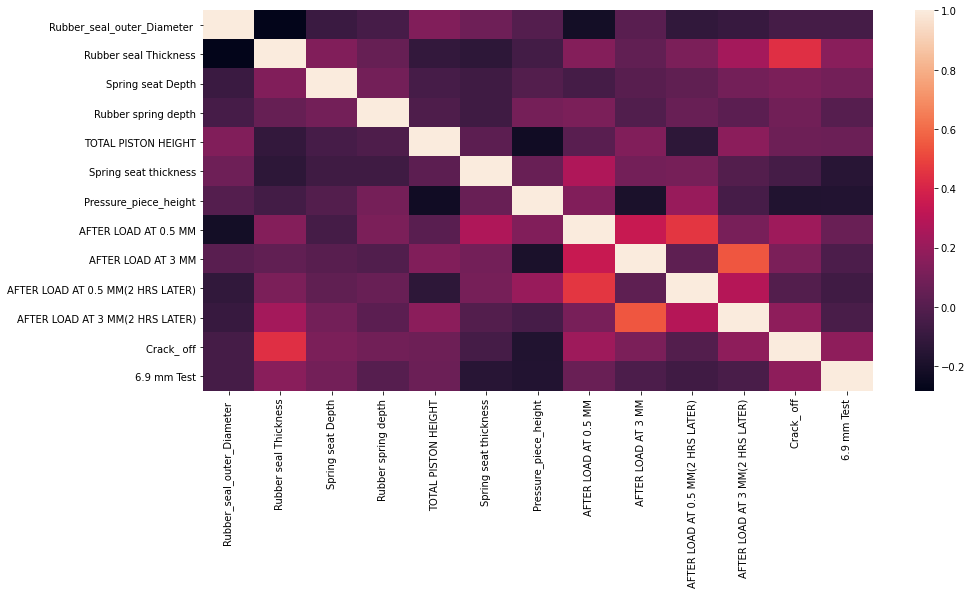

In [13]:
figure=plt.figure(figsize=(15,7))
sns.heatmap(dt2.corr())
plt.show()

In [14]:
dt2.columns

Index(['Rubber_seal_outer_Diameter ', 'Rubber seal Thickness',
       'Spring seat Depth', 'Rubber spring depth', 'TOTAL PISTON HEIGHT',
       'Spring seat thickness', 'Pressure_piece_height',
       'AFTER LOAD AT 0.5 MM', 'AFTER LOAD AT 3 MM',
       'AFTER LOAD AT 0.5 MM(2 HRS LATER)', 'AFTER LOAD AT 3 MM(2 HRS LATER)',
       'Crack_ off', '6.9 mm Test'],
      dtype='object')

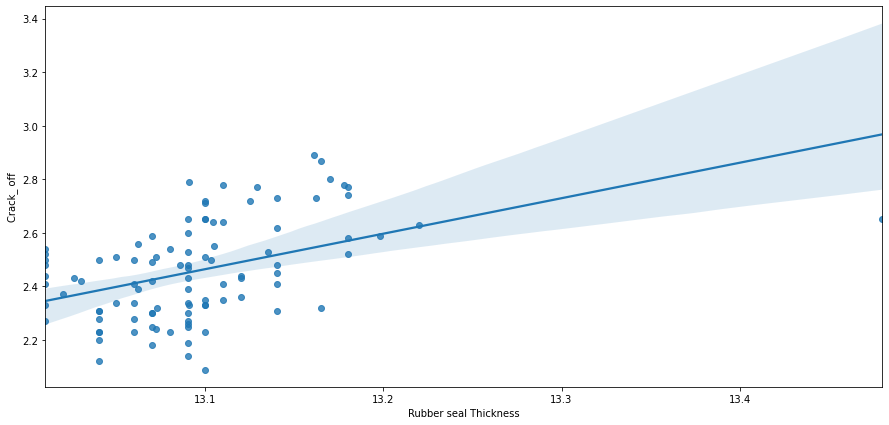

In [15]:
figure=plt.figure(figsize=(15,7))
sns.regplot(x='Rubber seal Thickness', y='Crack_ off', data=dt2)
plt.show()

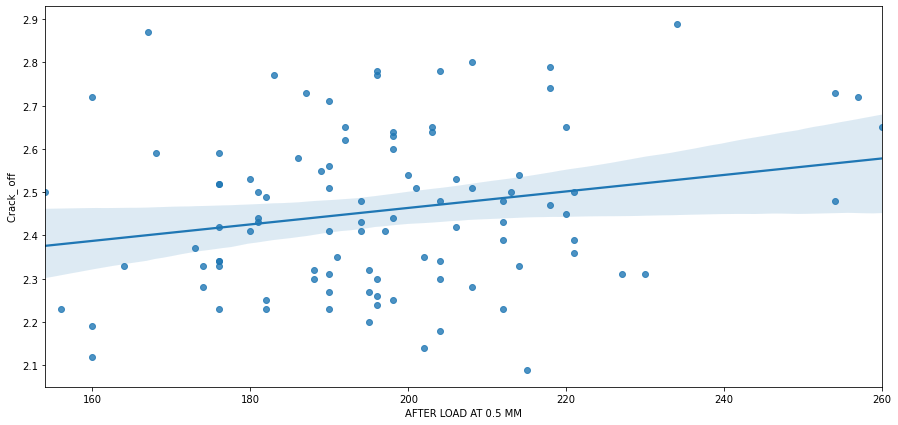

In [16]:
figure=plt.figure(figsize=(15,7))
sns.regplot(x='AFTER LOAD AT 0.5 MM', y='Crack_ off', data=dt2)
plt.show()

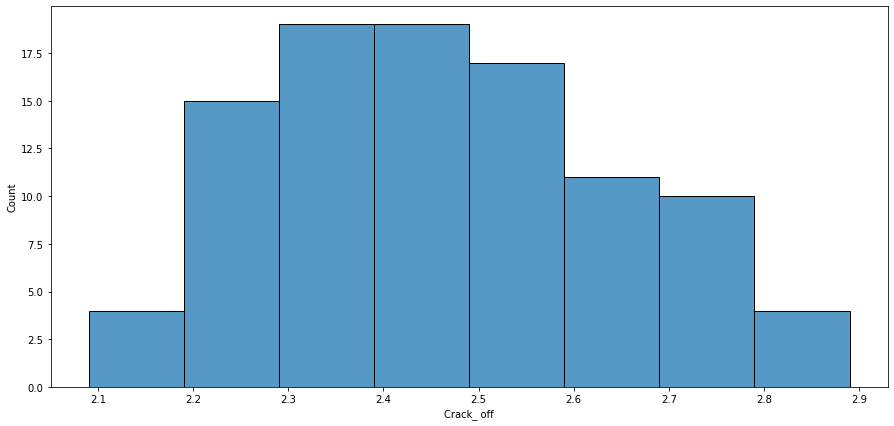

In [17]:
figure=plt.figure(figsize=(15,7))
sns.histplot(x='Crack_ off', data=dt2)
plt.show()

In [18]:
#k means clustering
# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [19]:
dt3=dt2.drop(['6.9 mm Test'], axis=1)
dt3.shape

(99, 12)

In [20]:
dt3.columns

Index(['Rubber_seal_outer_Diameter ', 'Rubber seal Thickness',
       'Spring seat Depth', 'Rubber spring depth', 'TOTAL PISTON HEIGHT',
       'Spring seat thickness', 'Pressure_piece_height',
       'AFTER LOAD AT 0.5 MM', 'AFTER LOAD AT 3 MM',
       'AFTER LOAD AT 0.5 MM(2 HRS LATER)', 'AFTER LOAD AT 3 MM(2 HRS LATER)',
       'Crack_ off'],
      dtype='object')

In [21]:
dt3.columns=['rsdia','rsthick','ssdepth','rsdepth','tpheight','ssthick','ppheight','load1','load2','load_1','load_2','crackoff']
dt3.head()             

,rsdia,rsthick,ssdepth,rsdepth,tpheight,ssthick,ppheight,load1,load2,load_1,load_2,crackoff
0,35.795,13.140,6.76,9.06,27.52,5.27,73.09,220,640,198,597,2.45
1,35.810,13.090,6.84,9.08,27.74,5.29,72.95,198,578,173,560,2.60
2,35.869,13.135,6.87,9.08,27.42,5.26,72.97,180,578,181,541,2.53
3,35.790,13.198,6.89,9.02,27.63,5.23,73.08,168,518,164,567,2.59
4,35.870,13.060,6.92,9.07,27.41,5.26,72.98,181,544,168,571,2.50


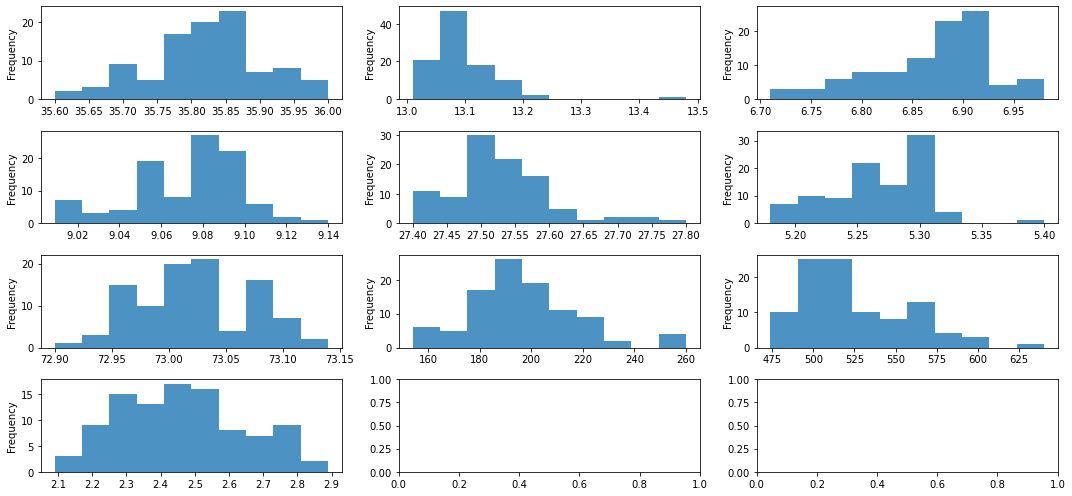

In [22]:
# to check the distribution of each variable
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15, 7))

# plot to different axes
dt3.rsdia.plot.hist(bins=10, alpha=0.8, ax=ax[0, 0], label='Rubber seal diameter')
dt3.rsthick.plot.hist(bins=10, alpha=0.8, ax=ax[0, 1],label='Rubber seal thickness')
dt3.ssdepth.plot.hist(bins=10, alpha=0.8, ax=ax[0, 2],label='Spring seat depth')
dt3.rsdepth.plot.hist(bins=10, alpha=0.8, ax=ax[1, 0],label='Rubber spring depth')
dt3.tpheight.plot.hist(bins=10, alpha=0.8, ax=ax[1, 1],label='Total piston height')
dt3.ssthick.plot.hist(bins=10, alpha=0.8, ax=ax[1, 2],label='spring seat thickness')
dt3.ppheight.plot.hist(bins=10, alpha=0.8, ax=ax[2, 0],label='Pressue piece height')
dt3.load1.plot.hist(bins=10, alpha=0.8, ax=ax[2, 1],label='Load at 0.5mm')
dt3.load2.plot.hist(bins=10, alpha=0.8, ax=ax[2, 2],label='Load at 3mm')
dt3.crackoff.plot.hist(bins=10, alpha=0.8, ax=ax[3, 0], label='Crack off')
plt.tight_layout()
plt.show()

In [23]:
# to check normality- 
from scipy.stats import anderson
for i in dt3.columns:
    print(anderson(dt3[i].values))

AndersonResult(statistic=0.43858151493675734, critical_values=array([0.555, 0.632, 0.758, 0.885, 1.052]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=2.3877648195973507, critical_values=array([0.555, 0.632, 0.758, 0.885, 1.052]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=2.37993979581006, critical_values=array([0.555, 0.632, 0.758, 0.885, 1.052]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=1.5997706448325886, critical_values=array([0.555, 0.632, 0.758, 0.885, 1.052]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=1.3696690223862902, critical_values=array([0.555, 0.632, 0.758, 0.885, 1.052]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=1.386900991789446, critical_values=array([0.555, 0.632, 0.758, 0.885, 1.052]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic

In [24]:
from sklearn.ensemble import RandomForestRegressor
X=dt3[['rsdia', 'rsthick', 'ssdepth', 'rsdepth', 'tpheight', 'ssthick',
       'ppheight', 'load1', 'load2']]
feature_names = [f"feature {i}" for i in range(X.shape[1])]
y=dt3['crackoff']
forest=RandomForestRegressor(random_state=0)
forest.fit(X,y)
importances=forest.feature_importances_

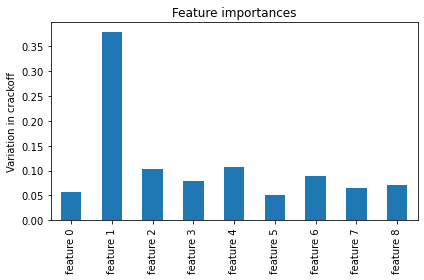

In [25]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Variation in crackoff")
fig.tight_layout()

In [26]:
from sklearn.preprocessing import StandardScaler
dt3_norm=StandardScaler().fit_transform(dt3)
dt3_norm=pd.DataFrame(dt3_norm)
dt3_norm.columns=['Rubber_seal_outer_Diameter ', 'Rubber seal Thickness',
       'Spring seat Depth', 'Rubber spring depth', 'TOTAL PISTON HEIGHT',
       'Spring seat thickness', 'Pressure_piece_height',
       'AFTER LOAD AT 0.5 MM', 'AFTER LOAD AT 3 MM',
       'AFTER LOAD AT 0.5 MM(2 HRS LATER)', 'AFTER LOAD AT 3 MM(2 HRS LATER)',
       'Crack_ off']
dt3_norm.head()

,Rubber_seal_outer_Diameter,Rubber seal Thickness,Spring seat Depth,Rubber spring depth,TOTAL PISTON HEIGHT,Spring seat thickness,Pressure_piece_height,AFTER LOAD AT 0.5 MM,AFTER LOAD AT 3 MM,AFTER LOAD AT 0.5 MM(2 HRS LATER),AFTER LOAD AT 3 MM(2 HRS LATER),Crack_ off
0,-0.316633,0.744990,-1.901275,-0.546746,-0.055996,0.124315,1.302281,1.115616,3.522468,0.463094,2.740490,-0.040347
1,-0.137509,-0.073590,-0.525227,0.233757,2.933214,0.664102,-1.455490,0.063294,1.618716,-0.686512,1.472853,0.780402
2,0.567044,0.663132,-0.009208,0.233757,-1.414728,-0.145579,-1.061523,-0.797697,1.618716,-0.318638,0.821905,0.397386
3,-0.376341,1.694543,0.334804,-2.107751,1.438609,-0.955260,1.105297,-1.371690,-0.223624,-1.100370,1.712677,0.725686
4,0.578986,-0.564737,0.850822,-0.156495,-1.550601,-0.145579,-0.864539,-0.749864,0.574723,-0.916433,1.849718,0.233236


In [27]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dt3_norm)

KMeans(n_clusters=3)

In [28]:
Klab2=kmeans.labels_
Klab2

array([0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       0, 0, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 1, 0, 0, 2, 0, 0, 2, 2, 2, 0])

In [29]:
type(Klab2)

numpy.ndarray

In [30]:
klab2=pd.DataFrame(Klab2)
dt5=pd.concat([dt3,klab2], axis=1)
dt5.head()

,rsdia,rsthick,ssdepth,rsdepth,tpheight,ssthick,ppheight,load1,load2,load_1,load_2,crackoff,0
0,35.795,13.140,6.76,9.06,27.52,5.27,73.09,220,640,198,597,2.45,0
1,35.810,13.090,6.84,9.08,27.74,5.29,72.95,198,578,173,560,2.60,0
2,35.869,13.135,6.87,9.08,27.42,5.26,72.97,180,578,181,541,2.53,1
3,35.790,13.198,6.89,9.02,27.63,5.23,73.08,168,518,164,567,2.59,1
4,35.870,13.060,6.92,9.07,27.41,5.26,72.98,181,544,168,571,2.50,1


In [31]:
dt5.to_excel("data with clusters.xlsx")

In [32]:
#pycaret-regression

In [34]:
data = dt3.sample(frac=0.8, random_state=786).reset_index(drop=True)
data_unseen = dt3.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (79, 12)
Unseen Data For Predictions: (20, 12)


In [35]:
data.head

<bound method NDFrame.head of      rsdia  rsthick  ssdepth  rsdepth  tpheight  ssthick  ppheight  load1  \
0   36.000   13.100    6.810    9.010    27.600     5.25    72.970    160   
1   35.760   13.129    6.884    9.093    27.509     5.31    73.031    196   
2   35.920   13.072    6.900    9.080    27.560     5.20    73.100    196   
3   35.940   13.040    6.710    9.075    27.580     5.29    73.070    190   
4   35.787   13.091    6.901    9.081    27.503     5.30    73.005    218   
..     ...      ...      ...      ...       ...      ...       ...    ...   
74  35.790   13.040    6.810    9.060    27.550     5.21    73.010    213   
75  35.814   13.090    6.830    9.080    27.580     5.25    73.100    196   
76  35.870   13.090    6.980    9.110    27.430     5.26    73.100    181   
77  35.690   13.100    6.910    9.080    27.530     5.27    72.980    164   
78  35.600   13.125    6.890    9.092    27.495     5.32    72.992    257   

    load2  load_1  load_2  crackoff  
0     5

In [36]:
from pycaret.regression import *

In [37]:
exp_reg101 = setup(data = data, target = 'crackoff', session_id=123)

,Description,Value
0,session_id,123
1,Target,crackoff
2,Original Data,"(79, 12)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(55, 11)"


In [38]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.1227,0.0225,0.1465,0.1841,0.0420,0.0498,0.0510
et,Extra Trees Regressor,0.1263,0.0241,0.1514,0.1110,0.0434,0.0511,0.0430
catboost,CatBoost Regressor,0.1289,0.0251,0.1550,0.0700,0.0444,0.0522,0.7840
br,Bayesian Ridge,0.1370,0.0303,0.1675,0.0411,0.0480,0.0554,0.0060
gbr,Gradient Boosting Regressor,0.1259,0.0248,0.1546,0.0391,0.0446,0.0514,0.0120
lr,Linear Regression,0.1256,0.0262,0.1566,0.0238,0.0451,0.0513,14.3520
lar,Least Angle Regression,0.1255,0.0262,0.1566,0.0233,0.0451,0.0513,0.0070
ada,AdaBoost Regressor,0.1300,0.0269,0.1589,0.0120,0.0455,0.0527,0.0200
lightgbm,Light Gradient Boosting Machine,0.1239,0.0251,0.1566,-0.0122,0.0448,0.0501,0.0160
omp,Orthogonal Matching Pursuit,0.1451,0.0288,0.1649,-0.0254,0.0477,0.0593,0.0050


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [39]:
rf=create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1008,0.0128,0.1130,-0.5532,0.0325,0.0411
1,0.1272,0.0190,0.1378,0.5101,0.0389,0.0497
2,0.1551,0.0317,0.1779,-0.4228,0.0510,0.0612
3,0.1327,0.0221,0.1486,0.4061,0.0430,0.0548
4,0.1259,0.0233,0.1525,0.0846,0.0434,0.0516
5,0.1825,0.0469,0.2166,0.3094,0.0623,0.0756
6,0.1135,0.0256,0.1601,0.4770,0.0436,0.0419
7,0.0892,0.0107,0.1035,0.3811,0.0309,0.0382
8,0.1179,0.0206,0.1435,0.3870,0.0407,0.0467
9,0.0823,0.0125,0.1118,0.2616,0.0343,0.0371


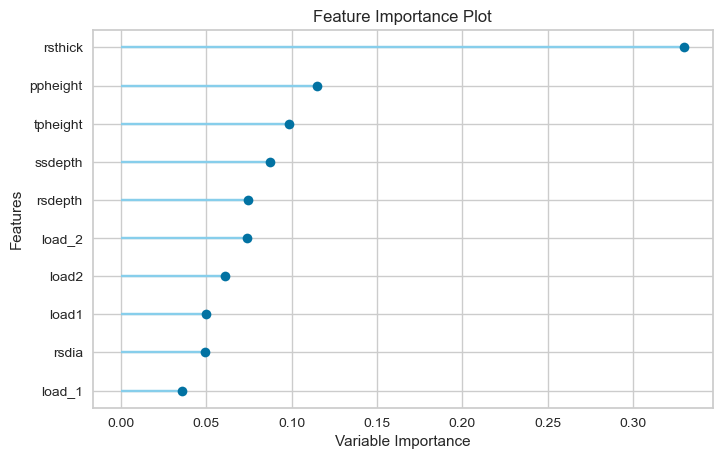

In [41]:
plot_model(rf, plot='feature')

In [43]:
predict_model(rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.1355,0.0261,0.1616,0.3302,0.0468,0.0552


,rsdia,rsthick,ssdepth,rsdepth,tpheight,ssthick,ppheight,load1,load2,load_1,load_2,crackoff,Label
0,35.820000,13.178,6.905,9.091,27.497999,5.220,73.016998,196.0,490.0,218.0,526.0,2.78,2.6974
1,35.840000,13.090,6.800,9.020,27.610001,5.210,73.010002,204.0,512.0,198.0,504.0,2.34,2.4365
2,35.869999,13.120,6.900,9.140,27.500000,5.260,73.089996,198.0,501.0,171.0,483.0,2.44,2.4935
3,35.786999,13.091,6.901,9.081,27.503000,5.300,73.004997,218.0,521.0,202.0,517.0,2.79,2.4675
4,35.860001,13.010,6.710,9.110,27.540001,5.290,73.080002,254.0,515.0,212.0,527.0,2.48,2.4075
5,35.910000,13.040,6.860,9.080,27.490000,5.300,73.040001,212.0,530.0,204.0,516.0,2.23,2.4117
6,35.939999,13.020,6.960,9.020,27.540001,5.240,72.949997,173.0,570.0,132.0,484.0,2.37,2.4560
7,35.869999,13.090,6.980,9.110,27.430000,5.260,73.099998,181.0,504.0,182.0,576.0,2.43,2.3645
8,35.939999,13.072,6.780,9.100,27.620001,5.250,72.940002,208.0,504.0,183.0,498.0,2.51,2.4661
9,35.790001,13.198,6.890,9.020,27.629999,5.230,73.080002,168.0,518.0,164.0,567.0,2.59,2.6330


In [44]:
unseen_predict=predict_model(rf, data=data_unseen)
unseen_predict

,rsdia,rsthick,ssdepth,rsdepth,tpheight,ssthick,ppheight,load1,load2,load_1,load_2,crackoff,Label
0,35.910,13.040,6.860,9.080,27.49,5.300,73.040,212,530,204,516,2.23,2.4117
1,35.860,13.103,6.901,9.060,27.54,5.310,73.100,221,518,218,531,2.50,2.4785
2,35.860,13.010,6.790,9.110,27.45,5.300,73.040,181,497,186,494,2.44,2.3501
3,35.940,13.026,6.784,9.040,27.58,5.260,72.960,194,502,207,518,2.43,2.4216
4,35.790,13.040,6.810,9.060,27.55,5.210,73.010,213,533,198,489,2.50,2.4337
5,35.860,13.090,6.862,9.060,27.40,5.240,73.060,160,484,213,502,2.19,2.2271
6,35.830,13.060,6.900,9.100,27.70,5.290,73.064,176,496,224,536,2.34,2.4052
7,35.714,13.090,6.880,9.080,27.55,5.300,72.980,218,521,180,501,2.47,2.4639
8,35.820,13.140,6.950,9.040,27.56,5.314,73.040,230,544,197,514,2.31,2.5315
9,35.820,13.070,6.910,9.110,27.56,5.270,73.010,182,518,221,537,2.25,2.4979


In [45]:
#scikit learn rf regressor
from sklearn.ensemble import RandomForestRegressor
y=dt3['crackoff']
X=dt3.drop(['crackoff'], axis=1)


In [49]:
y.shape

(99,)

In [51]:
regr = RandomForestRegressor(n_estimators=5, random_state=0)
regr.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [52]:
regr.feature_importances_

array([0.05936046, 0.40226562, 0.08147467, 0.03467505, 0.08630722,
       0.04207616, 0.06954044, 0.03930796, 0.03994775, 0.0434418 ,
       0.10160287])

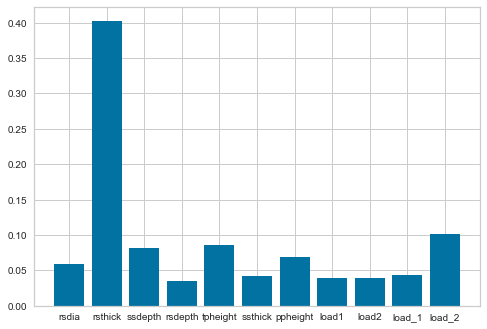

In [57]:
plt.bar(X.columns, regr.feature_importances_)
plt.show()